In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import bilstm_crf_model

In [16]:
model, (train_x, train_y), (test_x, test_y) = bilstm_crf_model.create_model()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 200)         851600    
_________________________________________________________________
bidirectional_7 (Bidirection (None, None, 200)         240800    
_________________________________________________________________
crf_layer (CRF)              (None, None)              1470      
Total params: 1,093,870
Trainable params: 1,093,870
Non-trainable params: 0
_________________________________________________________________


In [17]:
train_x

array([[  0,   0,   0, ...,   0,  42,  43],
       [  0,   0,   0, ...,  66,  67,  68],
       [  0,   0,   0, ...,  91,  53,  68],
       ...,
       [  0,   0,   0, ..., 337, 159,  68],
       [  0,   0,   0, ...,  24, 883,  16],
       [  0,   0,   0, ..., 568, 138,  68]], dtype=int32)

In [20]:
train_y[100]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [3],
       [4],
    

In [6]:
EPOCHS = 10
# train model
histroy = model.fit(train_x, train_y, 
                    batch_size=16,epochs=EPOCHS, 
                    validation_data=(test_x, test_y)
                    )
model.save('{}/crf.h5'.format(bilstm_crf_model.model_dir))
# model.save('{}/bilstm_softmax.h5'.format(bilstm_crf_model.model_dir))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 200)         851600    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 200)         240800    
_________________________________________________________________
crf_layer (CRF)              (None, None)              1470      
Total params: 1,093,870
Trainable params: 1,093,870
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3167/3167 [==============================] - 236s 74ms/step - loss: 6.0197 - crf_accuracy: 0.9791 - val_loss: 2.5564 - val_crf_accuracy: 0.9874
Epoch 2/10
3167/3167 [==============================] - 227s 72ms/step - loss: 1.6027 - crf_accuracy: 0.9905 - val_loss: 1.5065 - val_crf_accuracy: 0.9904
Epoch 3/10
3167/3167 [==============================] - 226s 71m

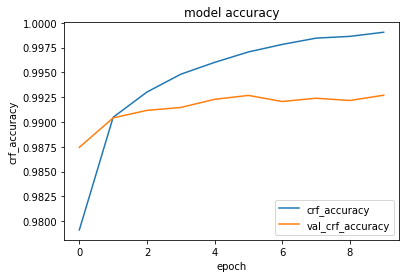

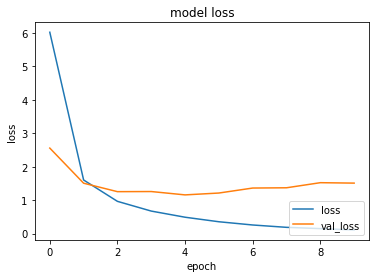

In [8]:
import matplotlib.pyplot as plt
acc = "crf_accuracy"
val_acc = 'val_crf_accuracy'
loss = "loss"
val_loss = 'val_loss'
def plot_history(history):
    plt.plot(history.history[acc])
    plt.plot(history.history[val_acc])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel(acc)
    plt.legend([acc, val_acc], loc='lower right')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

plot_history(histroy)

In [ ]:
# for y in test_y:
#     print()

In [13]:
import bilstm_crf_model
import process_data
import numpy as np

model, (vocab, chunk_tags) = bilstm_crf_model.create_model(train=False)
predict_text = '中华人民共和国国务院总理周恩来在外交部长陈毅和王东的陪同下，连续访问了埃塞俄比亚等非洲10国以及阿尔巴尼亚'
str, length = process_data.process_data(predict_text, vocab)
model.load_weights('{}/crf.h5'.format(bilstm_crf_model.model_dir))
# model.load_weights('model/bilstm_softmax.h5')
raw = model.predict(str)[0][-length:]
print(raw)
# result = [np.argmax(row) for row in raw]
result = raw
print(result_tags)
result_tags = [chunk_tags[i] for i in result]

per, loc, org = '', '', ''

for s, t in zip(predict_text, result_tags):
    if t in ('B-PER', 'I-PER'):
        per += ' ' + s if (t == 'B-PER') else s
    if t in ('B-ORG', 'I-ORG'):
        org += ' ' + s if (t == 'B-ORG') else s
    if t in ('B-LOC', 'I-LOC'):
        loc += ' ' + s if (t == 'B-LOC') else s

print(['person:' + per, 'location:' + loc, 'organzation:' + org])

/Users/derbysofti81/miniforge3/envs/datasci_1/lib/python3.9/site-packages/tensorflow/python/autograph/impl/api.py:376: UserWarning: CRF decoding models have serialization issues in TF >=2.5 . Please see isse #2476
  return py_builtins.overload_of(f)(*args)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 200)         851600    
_________________________________________________________________
bidirectional_6 (Bidirection (None, None, 200)         240800    
_________________________________________________________________
crf_layer (CRF)              (None, None)              1470      
Total params: 1,093,870
Trainable params: 1,093,870
Non-trainable params: 0
_________________________________________________________________
[5 6 6 6 6 6 6 6 6 6 0 0 1 2 2 0 5 6 6 0 1 2 0 1 2 0 0 0 0 0 0 0 0 0 0 3 4
 4 4 4 0 3 4 0 0 0 0 0 3 4 4 4 4]
['B-ORG'